<a href="https://colab.research.google.com/github/CarlosGatti/python-finance/blob/main/Calculating_the_Return_of_a_Portfolio_of_Securities_Solution_Yahoo_Py3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period 2021-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2021-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2021-01-04 to 2021-03-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      49 non-null     float64
 1   F       49 non-null     float64
 2   XOM     49 non-null     float64
 3   LNC     49 non-null     float64
 4   AAPL    49 non-null     float64
dtypes: float64(5)
memory usage: 2.3 KB


In [5]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2021-01-04,20.551737,8.52,40.807007,48.430405,129.216919
2021-01-05,22.081030,8.65,42.773609,48.718090,130.814514
2021-01-06,23.097271,8.84,43.865074,52.150478,126.411102
2021-01-07,23.590591,9.06,44.209229,52.210003,130.724655
2021-01-08,24.074045,9.00,44.700878,51.410000,131.852966


In [6]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2021-03-09,26.110001,12.57,59.930000,60.130001,121.089996
2021-03-10,26.650000,12.91,61.770000,61.520000,119.980003
2021-03-11,26.650000,12.81,61.310001,61.709999,121.959999
2021-03-12,26.959999,13.37,61.970001,62.799999,121.029999
2021-03-15,26.490000,13.20,60.389999,63.639999,123.989998


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [7]:
mydata.iloc[0]

BP       20.551737
F         8.520000
XOM      40.807007
LNC      48.430405
AAPL    129.216919
Name: 2021-01-04 00:00:00, dtype: float64

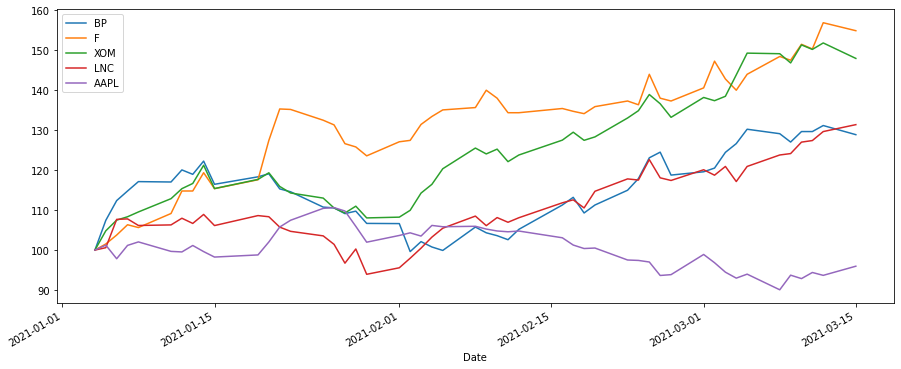

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [9]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.074412,0.015258,0.048193,0.005940,0.012364
2021-01-06,0.046023,0.021965,0.025517,0.070454,-0.033661
2021-01-07,0.021358,0.024887,0.007846,0.001141,0.034123
2021-01-08,0.020493,-0.006623,0.011121,-0.015323,0.008631


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [10]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [11]:
annual_returns = returns.mean() * 250
annual_returns

BP      1.425339
F       2.380587
XOM     2.116777
LNC     1.506344
AAPL   -0.156587
dtype: float64

In [12]:
np.dot(annual_returns, weights)

1.4544920391754497

Transform the result into a percentage form. 

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

145.449 %
